In [1]:
! pip install imblearn


In [2]:
import pandas as pd # v 1.5.3
import numpy as np  # v 1.21.5
import sklearn as sk
import statsmodels.api as sm # v 0.13.5
import matplotlib.pyplot as plt # 3.6.3
import seaborn as sns # 0. 12. 2
import warnings as ww
import statsmodels.tsa.stattools as stattools # v 0.13.5


from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

from statsmodels.tsa.stattools import adfuller # v 0.13.5
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # v 0.13.5
from statsmodels.tsa.arima_model import ARIMA # v 0.13.5

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv('/Users/liamcarney9/Downloads/loan_default_data_set.csv')

In [4]:
df.shape, df.columns, df.dtypes

((20000, 21),
 Index(['tot_balance', 'avg_bal_cards', 'credit_age', 'credit_age_good_account',
        'credit_card_age', 'num_acc_30d_past_due_12_months',
        'num_acc_30d_past_due_6_months', 'num_mortgage_currently_past_due',
        'tot_amount_currently_past_due', 'num_inq_12_month',
        'num_card_inq_24_month', 'num_card_12_month', 'num_auto_ 36_month',
        'uti_open_card', 'pct_over_50_uti', 'uti_max_credit_line',
        'pct_card_over_50_uti', 'ind_XYZ', 'rep_income', 'rep_education',
        'Def_ind'],
       dtype='object'),
 tot_balance                        float64
 avg_bal_cards                      float64
 credit_age                           int64
 credit_age_good_account              int64
 credit_card_age                      int64
 num_acc_30d_past_due_12_months       int64
 num_acc_30d_past_due_6_months        int64
 num_mortgage_currently_past_due      int64
 tot_amount_currently_past_due      float64
 num_inq_12_month                     int64
 num_c

In [5]:
# Replacing missing values with the mode of that column

columns_to_fill = ['pct_card_over_50_uti', 'rep_income']
for column in columns_to_fill:
    mean = df[column].mean()  
    df[column].fillna(mean, inplace=True)  
for column in df.columns:
    mode = df[column].mode().iloc[0]  
    df[column] = df[column].fillna(mode) 

In [6]:
df.isna().sum()

tot_balance                        0
avg_bal_cards                      0
credit_age                         0
credit_age_good_account            0
credit_card_age                    0
num_acc_30d_past_due_12_months     0
num_acc_30d_past_due_6_months      0
num_mortgage_currently_past_due    0
tot_amount_currently_past_due      0
num_inq_12_month                   0
num_card_inq_24_month              0
num_card_12_month                  0
num_auto_ 36_month                 0
uti_open_card                      0
pct_over_50_uti                    0
uti_max_credit_line                0
pct_card_over_50_uti               0
ind_XYZ                            0
rep_income                         0
rep_education                      0
Def_ind                            0
dtype: int64

In [7]:
df_dummies = pd.get_dummies(df, columns = ["rep_education"])
df_dummies

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other
0,102956.11010,14819.057400,238,104,264,0,0,0,0.000000,0,...,0.342183,0.513934,0.550866,0,118266.321300,0,1,0,0,0
1,132758.72580,18951.934550,384,197,371,0,0,0,0.000000,0,...,0.540671,0.418016,0.550964,0,89365.057650,0,1,0,0,0
2,124658.91740,15347.929690,277,110,288,0,0,0,0.000000,0,...,0.338560,0.341627,0.451417,0,201365.121300,0,1,0,0,0
3,133968.53690,14050.713340,375,224,343,0,0,0,0.000000,2,...,0.683589,0.542940,0.607843,0,191794.485500,0,1,0,0,0
4,143601.80170,14858.515270,374,155,278,0,0,0,0.000000,0,...,0.510812,0.632934,0.573680,0,161465.367900,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,89665.13930,11521.159950,319,139,363,0,0,0,0.000000,0,...,0.634712,0.527230,0.602345,0,166373.900129,0,0,0,1,0
19996,136211.63530,17977.054130,297,137,273,0,0,0,0.000000,2,...,0.450030,0.545108,0.550964,1,166373.900129,0,0,0,1,0
19997,110721.87650,13316.820540,304,151,257,0,0,0,0.000000,0,...,0.340289,0.412155,0.550964,0,157706.158100,0,1,0,0,0
19998,96742.36371,11743.262370,275,141,294,2,1,1,3009.387661,0,...,0.582007,0.301612,0.697052,1,97387.974140,1,1,0,0,0


In [8]:
# classifying the default rates into either majority or minority classes

majority = df_dummies[df_dummies['Def_ind']==0]
minority = df_dummies[df_dummies['Def_ind']==1]

In [9]:
# oversampling

minority_oversampled = resample(minority, replace = True, n_samples=len(majority))
oversampled = pd.concat([majority, minority_oversampled])

oversampled.describe()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other
count,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,...,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000
mean,104716.810073,11760.628426,270.847583,141.886417,277.750500,0.334139,0.088306,0.085639,972.161855,0.802889,...,0.511944,0.493333,0.578252,0.225750,166455.252801,0.500000,0.599833,0.110083,0.283667,0.006417
std,24641.414480,3725.090760,73.031921,38.523951,64.044483,0.717096,0.302323,0.279834,3134.014619,1.328356,...,0.127247,0.133681,0.124597,0.418081,31804.294784,0.500007,0.489939,0.312998,0.450783,0.079848
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87957.518990,9236.396998,221.000000,116.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.425430,0.405312,0.502705,0.000000,146231.087625,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104125.496650,11650.469980,271.000000,142.000000,276.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.513497,0.492996,0.565003,0.000000,166373.900129,0.500000,1.000000,0.000000,0.000000,0.000000
75%,121820.656500,14313.298945,320.000000,168.000000,322.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.597699,0.581461,0.660506,0.000000,185923.476800,1.000000,1.000000,0.000000,1.000000,0.000000
max,200000.000000,25000.000000,560.000000,300.000000,550.000000,5.000000,2.000000,1.000000,35000.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
oversampled.Def_ind.value_counts()

0    18000
1    18000
Name: Def_ind, dtype: int64

In [11]:
# undersampling

majority_undersampled = resample(majority, replace = False, n_samples = len(minority))
undersampled = pd.concat([minority, majority_undersampled])

undersampled.describe()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,Def_ind,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,104877.463078,11775.639415,271.501500,142.823250,278.458500,0.330500,0.085250,0.084500,948.603132,0.804250,...,0.512151,0.492492,0.578502,0.22475,166143.220529,0.500000,0.603000,0.108250,0.284000,0.004750
std,24747.659028,3734.230315,72.794902,38.434988,63.928346,0.709151,0.297497,0.278171,3064.047897,1.326036,...,0.126478,0.133862,0.124295,0.41747,32194.313736,0.500063,0.489337,0.310735,0.450993,0.068765
min,22812.248470,0.000000,1.000000,2.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.083939,0.000000,0.101132,0.00000,40869.260020,0.000000,0.000000,0.000000,0.000000,0.000000
25%,87865.243605,9236.728571,222.000000,117.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.427006,0.405572,0.503382,0.00000,145311.848275,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104566.284800,11697.470225,271.000000,143.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.512327,0.490604,0.565515,0.00000,166373.900129,0.500000,1.000000,0.000000,0.000000,0.000000
75%,121984.420475,14287.529932,322.000000,169.000000,324.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.597376,0.579514,0.659905,0.00000,185790.118000,1.000000,1.000000,0.000000,1.000000,0.000000
max,200000.000000,25000.000000,550.000000,286.000000,515.000000,5.000000,2.000000,1.000000,30669.898540,10.000000,...,1.000000,1.000000,1.000000,1.00000,273492.545400,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
undersampled.Def_ind.value_counts()

1    2000
0    2000
Name: Def_ind, dtype: int64

In [13]:
# SMOTE

In [15]:
y = df_dummies["Def_ind"]
X = df_dummies.loc[:, df_dummies.columns != "Def_ind"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [16]:
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [18]:
smote_df = pd.DataFrame(X_train_smote, columns = X.columns)
smote_df['Def_ind'] = y_train_smote
smote_df=smote_df.dropna()
smote_df = pd.concat([smote_df, pd.DataFrame(X_test), pd.DataFrame(y_test, columns = ["Def_ind"])])
smote_df.describe()

,tot_balance,avg_bal_cards,credit_age,credit_age_good_account,credit_card_age,num_acc_30d_past_due_12_months,num_acc_30d_past_due_6_months,num_mortgage_currently_past_due,tot_amount_currently_past_due,num_inq_12_month,...,pct_over_50_uti,uti_max_credit_line,pct_card_over_50_uti,ind_XYZ,rep_income,rep_education_college,rep_education_graduate,rep_education_high_school,rep_education_other,Def_ind
count,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,...,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000,31994.000000
mean,105256.341568,11833.317291,272.459586,142.583891,279.275302,0.208195,0.044915,0.044915,723.005959,0.652622,...,0.507586,0.488071,0.574746,0.169657,166415.312257,0.505188,0.078202,0.205288,0.004438,0.437395
std,24233.049877,3565.166677,68.671042,36.263418,60.143285,0.556282,0.212777,0.207120,2528.624419,1.130627,...,0.118451,0.126668,0.117928,0.375337,31520.491411,0.499981,0.268494,0.403919,0.066474,0.496073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88473.189723,9387.579854,226.000000,118.000000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.430195,0.405920,0.505368,0.000000,146401.090075,0.000000,0.000000,0.000000,0.000000,0.000000
50%,104718.840072,11738.608135,271.000000,142.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.511548,0.489831,0.568460,0.000000,166373.900129,1.000000,0.000000,0.000000,0.000000,0.000000
75%,122206.595099,14279.229770,318.000000,167.000000,319.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.587806,0.572850,0.651564,0.000000,185616.017857,1.000000,0.000000,0.000000,0.000000,1.000000
max,200000.000000,25000.000000,560.000000,300.000000,550.000000,5.000000,2.000000,1.000000,35000.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,300000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# LDA and Logistic Regressions

In [20]:
# oversampled Logistic Reg

y_over = oversampled['Def_ind']
x_over = oversampled.loc[:, oversampled.columns != "Def_ind"]
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(x_over,y_over,test_size=0.25)

over_model = LogisticRegression()
over_model.fit(X_over_train, y_over_train)
print(over_model.intercept_, over_model.coef_, over_model.score(X_over_test, y_over_test))

[6.55841618e-05] [[ 3.66891874e-06 -8.40533880e-05 -5.51879414e-03  7.35286047e-04
   2.82068948e-03  2.27789274e-04  3.43132347e-05  3.23467459e-05
   3.07403012e-04  8.55506464e-04  1.34107366e-03  1.18426189e-04
   1.47797924e-05  2.05780374e-04  1.64077244e-04  1.66494810e-04
   1.69342306e-04 -9.21154784e-05  5.91916384e-06 -3.11005207e-06
  -3.08020813e-05  1.02328678e-04 -2.83238311e-06]] 0.6368888888888888


In [21]:
# oversampled LDA 

lda_over = LinearDiscriminantAnalysis()
over_model_lda = lda_over.fit(X_over_train, y_over_train)
print(over_model_lda.intercept_, over_model_lda.coef_, over_model_lda.score(X_over_test, y_over_test))

[-1.60820237] [[-1.70618729e-06 -9.51417031e-05 -4.82715485e-03  5.41193723e-04
   2.81464910e-05  9.98363785e-01  2.56464142e-01  2.88231152e-01
  -4.92737911e-05  3.48077491e-01 -5.52098783e-02  1.73610398e-01
  -1.26157259e-02  4.94570360e+00  6.61650249e-01  4.75891586e-01
   3.82406841e-01 -3.54012584e-01  1.35196994e-06 -2.46690129e-02
  -1.71262325e-01  1.22429373e-01 -3.84213397e-01]] 0.7237777777777777


In [22]:
# undersampled Logistic Reg

y_under = undersampled['Def_ind']
x_under = undersampled.loc[:, undersampled.columns != "Def_ind"]
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(x_under,y_under,test_size=0.25)

under_model = LogisticRegression()
under_model.fit(X_under_train, y_under_train)
print(under_model.intercept_, under_model.coef_, under_model.score(X_under_test, y_under_test))

[1.65860309e-06] [[ 2.76261282e-06 -6.92930605e-05 -1.57204031e-03 -6.63208696e-04
  -1.20174355e-03  9.05509965e-06  1.39703119e-06  1.26293131e-06
   3.31072962e-04  3.37342925e-05  5.58748620e-05  4.44417482e-06
   1.96559589e-07  8.38225143e-06  6.57353496e-06  6.70272283e-06
   6.54629434e-06 -3.74495411e-06  6.90637974e-06 -1.96604537e-06
  -5.76765145e-07  4.05224994e-06  1.49163665e-07]] 0.633


In [23]:
# undersampled LDA 

lda_under = LinearDiscriminantAnalysis()
under_model_lda = lda_under.fit(X_under_train, y_under_train)
print(under_model_lda.intercept_, under_model_lda.coef_, under_model_lda.score(X_under_test, y_under_test))

[-1.2034551] [[-5.13456391e-06 -7.29671050e-05 -3.05480063e-03 -1.78045384e-03
  -1.74475168e-03  1.02427023e+00  4.04047450e-01  3.16542403e-02
  -4.13185279e-05  2.35288239e-01  1.23913816e-02  1.85876192e-01
  -3.70709896e-02  5.36394931e+00  8.94414820e-01  4.05852486e-01
  -4.35713051e-02 -3.32406404e-01  1.38882650e-06 -8.43978200e-02
  -4.73608685e-02  1.15034647e-01  3.02608160e-01]] 0.704


In [24]:
smote_df=smote_df.dropna()

In [25]:
# smote Linear Regression

y_smote = smote_df['Def_ind']
x_smote = smote_df.loc[:, smote_df.columns != "Def_ind"]
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote,y_smote,test_size=0.25)

smote_model = LogisticRegression()
smote_model.fit(X_train_smote, y_train_smote)
print(smote_model.intercept_, smote_model.coef_, smote_model.score(X_test_smote, y_test_smote))

[1.55093076e-06] [[ 6.81499098e-06 -1.02099807e-04 -1.68868061e-03 -6.55330760e-04
  -1.09933409e-03 -1.74909832e-06 -1.13771632e-06 -1.26091777e-06
   3.30220260e-04  1.42137290e-05  3.37270170e-05 -1.22506908e-05
  -1.03358893e-05  9.19376201e-06  7.10478153e-06  7.11616136e-06
   7.43780452e-06 -1.73792856e-05  6.78990142e-06 -2.09914696e-05
  -8.76970234e-06 -1.13248662e-05 -6.09275745e-07]] 0.6366869165802341


In [26]:
# smote LDA 

lda_smote = LinearDiscriminantAnalysis()
smote_model_lda = lda_smote.fit(X_train_smote, y_train_smote)
print(smote_model_lda.intercept_, smote_model_lda.coef_, smote_model_lda.score(X_test_smote, y_test_smote))

[1.8554802] [[-1.49537671e-06 -9.21169677e-05 -6.40645152e-03  2.50640083e-04
   1.47552407e-03  2.92777221e-01 -4.92302355e-01 -1.29792352e-01
   2.04061175e-04 -2.38173134e-02  1.08883208e-01 -6.11925496e-01
  -1.01522870e+00  5.80389366e+00  6.92710273e-01 -2.99816303e-02
   7.47036987e-01 -1.49136250e+00 -2.31421498e-07 -3.72559779e+00
  -5.02811737e+00 -4.01768376e+00 -5.63030223e+00]] 0.8171580974959253


In [27]:
y_pred1 = under_model.predict(X_under_test)

In [28]:
# under log accuracy

accuracy_ULog = accuracy_score(y_under_test, y_pred1)
precision_ULog = precision_score(y_under_test, y_pred1)
recall_ULog = recall_score(y_under_test, y_pred1)

print(accuracy_ULog)
print(precision_ULog)
print(recall_ULog)

0.633
0.6742209631728046
0.4857142857142857


In [29]:
# under lda accuracy

y_pred2 = under_model_lda.predict(X_under_test)

accuracy_ULda = accuracy_score(y_under_test, y_pred2)
precision_ULda = precision_score(y_under_test, y_pred2)
recall_ULda = recall_score(y_under_test, y_pred2)

print(accuracy_ULda)
print(precision_ULda)
print(recall_ULda)

0.704
0.7108695652173913
0.6673469387755102


In [30]:
# over log accuracy

y_pred3 = over_model.predict(X_over_test)

accuracy_OLog = accuracy_score(y_over_test, y_pred3)
precision_OLog = precision_score(y_over_test, y_pred3)
recall_OLog = recall_score(y_over_test, y_pred3)

print(accuracy_OLog)
print(precision_OLog)
print(recall_OLog)

0.6368888888888888
0.6765843498958644
0.5104377104377105


In [31]:
# over lda accuracy

y_pred4 = over_model_lda.predict(X_over_test)

accuracy_OLda = accuracy_score(y_over_test, y_pred4)
precision_OLda = precision_score(y_over_test, y_pred4)
recall_OLda = recall_score(y_over_test, y_pred4)

print(accuracy_OLda)
print(precision_OLda)
print(recall_OLda)

0.7237777777777777
0.7330177514792899
0.6951739618406285


In [32]:
# smote log accuracy

y_pred5 = smote_model.predict(X_test_smote)

accuracy_SLog = accuracy_score(y_test_smote, y_pred5)
precision_SLog = precision_score(y_test_smote, y_pred5)
recall_SLog = recall_score(y_test_smote, y_pred5)

print(accuracy_SLog)
print(precision_SLog)
print(recall_SLog)

0.6366869165802341
0.6769996172981247
0.5238377257921232


In [33]:
# smote lda accuracy

y_pred6 = smote_model_lda.predict(X_test_smote)

accuracy_SLda = accuracy_score(y_test_smote, y_pred6)
precision_SLda = precision_score(y_test_smote, y_pred6)
recall_SLda = recall_score(y_test_smote, y_pred6)

print(accuracy_SLda)
print(precision_SLda)
print(recall_SLda)

0.8171580974959253
0.8847396768402155
0.7296416938110749


In [34]:
# after running the model for each type of sampling and both the linear regression and LDA models for each, it appears
# the best model is the last one, the SMOTE sampling LDA. It has the highest overall accuracy precision and recall

In [35]:
# y score for each model

yscore_underlog = under_model.predict_proba(X_under_test)[:,1]
yscore_underlda = under_model_lda.predict_proba(X_under_test)[:,1]
yscore_overlog= over_model.predict_proba(X_over_test)[:,1]
yscore_overlda= over_model_lda.predict_proba(X_over_test)[:,1]
yscore_smotelog = smote_model.predict_proba(X_test_smote)[:,1]
yscore_smotelda = smote_model_lda.predict_proba(X_test_smote)[:,1]

In [36]:
# fpr tpr and threshold for each model

fpr_overlog, tpr_overlog, thresholds_overlog = roc_curve(y_over_test, yscore_overlog)
roc_auc_overlog = auc(fpr_overlog, tpr_overlog)

fpr_underlog, tpr_underlog, thresholds_underlog = roc_curve(y_under_test, yscore_underlog)
roc_auc_underlog = auc(fpr_underlog, tpr_underlog)

fpr_overlda, tpr_overlda, thresholds_overlda = roc_curve(y_over_test, yscore_overlda)
roc_auc_overlda = auc(fpr_overlda, tpr_overlda)

fpr_underlda, tpr_underlda, thresholds_underlda = roc_curve(y_under_test, yscore_underlda)
roc_auc_underlda = auc(fpr_underlda, tpr_underlda)

fpr_smotelog, tpr_smotelog, thresholds_smotelog = roc_curve(y_test_smote, yscore_smotelog)
roc_auc_smotelog = auc(fpr_smotelog, tpr_smotelog)

fpr_smotelda, tpr_smotelda, thresholds_smotelda = roc_curve(y_test_smote, yscore_smotelda)
roc_auc_smotelda = auc(fpr_smotelda, tpr_smotelda)

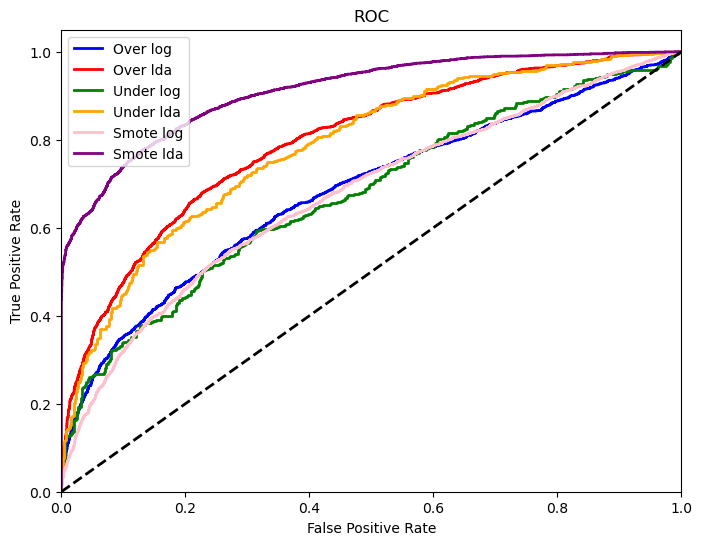

In [37]:
# plot roc_auc curve for each model

plt.figure(figsize=(8,6))
plt.plot(fpr_overlog, tpr_overlog, color='blue', lw=2, label = 'Over log' % roc_auc_overlog)
plt.plot(fpr_overlda, tpr_overlda, color='red', lw=2, label = 'Over lda' %  roc_auc_overlda)
plt.plot(fpr_underlog, tpr_underlog, color='green', lw=2, label = 'Under log' %  roc_auc_underlog)
plt.plot(fpr_underlda, tpr_underlda, color='orange', lw=2, label = 'Under lda' %  roc_auc_underlda)
plt.plot(fpr_smotelog, tpr_smotelog, color='pink', lw=2, label = 'Smote log' %  roc_auc_smotelog)
plt.plot(fpr_smotelda, tpr_smotelda, color='purple', lw=2, label = 'Smote lda' %  roc_auc_smotelda)

plt.plot([0,1],[0,1], color = 'black', lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="upper left")
plt.show()



In [38]:
# looking at this plot, it further confirms that the Smote Lda model is the best of the 6. When looking at ROC/AUC 
# curves, we want the graph to look like a right triangle in the upper left corner if it were perfect. That said
#, the purple line, smote lda, is the closest to this desired shape, with the highest true positive rate. 